#### Second Approach:

In [2]:
import pandas as pd

In [3]:
# Read the CSV file
df = pd.read_csv('dataset.csv')

df.head()

,id,text,lemma,upos,xpos,head,deprel,start_char,end_char
0,1,اس,یہ,DET,DEM,2,det,0,2
1,2,سلسلے,سلسلہ,NOUN,NN,5,nmod,3,8
2,3,کی,کا,ADP,PSP,2,case,9,11
3,4,دیگر,دیگر,ADJ,JJ,5,amod,12,16
4,5,اقساط,اقساط,NOUN,NN,7,nsubj,17,22


#### Preprocessing

In [4]:
data = df.drop(columns=['id'])

In [5]:
import numpy as np

# Create a new column 'y' with default value 'S_M'
data['y'] = 'S_M'

# Iterate through the rows to assign 'S_E' and 'S_B'
for i in range(len(data) - 1):
    # Check if the current word ends with a full stop
    if data.loc[i, 'text'].endswith('۔'):
        data.loc[i, 'y'] = 'S_E'  # Sentence End
        # Assign 'S_B' to the next word
        if i + 1 < len(data):
            data.loc[i + 1, 'y'] = 'S_B'  # Sentence Beginning

# Convert 'y' column to categorical type (optional, for ML efficiency)
data['y'] = data['y'].astype('category')

# Display the first few rows to verify
data.head(10)


,text,lemma,upos,xpos,head,deprel,start_char,end_char,y
0,اس,یہ,DET,DEM,2,det,0,2,S_M
1,سلسلے,سلسلہ,NOUN,NN,5,nmod,3,8,S_M
2,کی,کا,ADP,PSP,2,case,9,11,S_M
3,دیگر,دیگر,ADJ,JJ,5,amod,12,16,S_M
4,اقساط,اقساط,NOUN,NN,7,nsubj,17,22,S_M
5,یہاں,یہاں,PRON,PRP,7,obl,23,27,S_M
6,پڑھیے,پڑھ,VERB,VM,0,root,28,33,S_M
7,۔,۔,PUNCT,SYM,7,punct,33,34,S_E
8,یہ,یہ,PRON,PRP,3,nsubj,36,38,S_B
9,کیسے,کیسا,PRON,WQ,3,advmod,39,43,S_M


In [6]:
import numpy as np

# Create a new column 'y' with default value 'S_M'
data['y'] = 'S_M'

# Iterate through the rows to assign 'S_E' and 'S_B'
for i in range(len(data) - 1):
    # Check if the current word ends with a full stop
    if data.loc[i, 'text'].endswith('۔'):
        data.loc[i, 'y'] = 'S_E'  # Sentence End
        # Assign 'S_B' to the next word
        if i + 1 < len(data):
            data.loc[i + 1, 'y'] = 'S_B'  # Sentence Beginning

# Map categorical labels to numeric values
label_mapping = {'S_E': 1, 'S_B': 2, 'S_M': 3}
data['y'] = data['y'].map(label_mapping)

# Verify the result
data.head(10)

,text,lemma,upos,xpos,head,deprel,start_char,end_char,y
0,اس,یہ,DET,DEM,2,det,0,2,3
1,سلسلے,سلسلہ,NOUN,NN,5,nmod,3,8,3
2,کی,کا,ADP,PSP,2,case,9,11,3
3,دیگر,دیگر,ADJ,JJ,5,amod,12,16,3
4,اقساط,اقساط,NOUN,NN,7,nsubj,17,22,3
5,یہاں,یہاں,PRON,PRP,7,obl,23,27,3
6,پڑھیے,پڑھ,VERB,VM,0,root,28,33,3
7,۔,۔,PUNCT,SYM,7,punct,33,34,1
8,یہ,یہ,PRON,PRP,3,nsubj,36,38,2
9,کیسے,کیسا,PRON,WQ,3,advmod,39,43,3


In [7]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [ ]:
# One-hot encode 'upos', 'xpos', and 'deprel'
encoder = OneHotEncoder(sparse_output=False)
encoded_cats = encoder.fit_transform(data[['upos', 'xpos', 'deprel']])

# Convert to DataFrame for easier merging
encoded_cats_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out())

# Concatenate encoded features back to the dataset
data = pd.concat([data.reset_index(drop=True), encoded_cats_df], axis=1)

# Drop the original categorical columns (optional)
data = data.drop(columns=['upos', 'xpos', 'deprel'])

c:\Users\Kanza Nasim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [9]:
# Select the numerical features to normalize
numerical_features = ['start_char', 'end_char', 'head']

# Option 2: Standard Scaling (zero mean and unit variance)
standard_scaler = StandardScaler()
data[numerical_features] = standard_scaler.fit_transform(data[numerical_features])

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine text and lemma columns into a single string representation (if needed)
data['text_lemma'] = data['text'] + " " + data['lemma']

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=500)  # Adjust max_features as needed

# Fit and transform the combined text and lemma
tfidf_features = tfidf_vectorizer.fit_transform(data['text_lemma'])

# Convert the sparse matrix to a DataFrame for better integration
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Add the TF-IDF features back to the original DataFrame
data = pd.concat([data.reset_index(drop=True), tfidf_df], axis=1)

# Drop the original text and lemma columns (optional)
data = data.drop(columns=['text', 'lemma', 'text_lemma'])

In [11]:
data.head(10)

,head,start_char,end_char,y,upos_ADJ,upos_ADP,upos_ADV,upos_AUX,upos_CCONJ,upos_DET,...,ہوں,ہی,ہیں,ہے,یا,یعنی,یقینا,یہ,یہاں,یہی
0,-1.051740,-1.732661,-1.732666,3,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.646811,0.0,0.0
1,-0.857181,-1.732652,-1.732647,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,-1.051740,-1.732634,-1.732638,3,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,-0.857181,-1.732625,-1.732623,3,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,-0.727474,-1.732609,-1.732604,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5,-0.727474,-1.732591,-1.732589,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0
6,-1.181446,-1.732575,-1.732571,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
7,-0.727474,-1.732560,-1.732568,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
8,-0.986887,-1.732551,-1.732555,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0
9,-0.986887,-1.732542,-1.732540,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


#### Spliting the data

In [12]:
# Define the feature matrix (drop 'y') and target
X = data.drop(columns=['y'])
y = data['y']

In [13]:
# Split into training (64%), validation (16%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.36, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.56, random_state=42, stratify=y_temp)


### Decision Tree
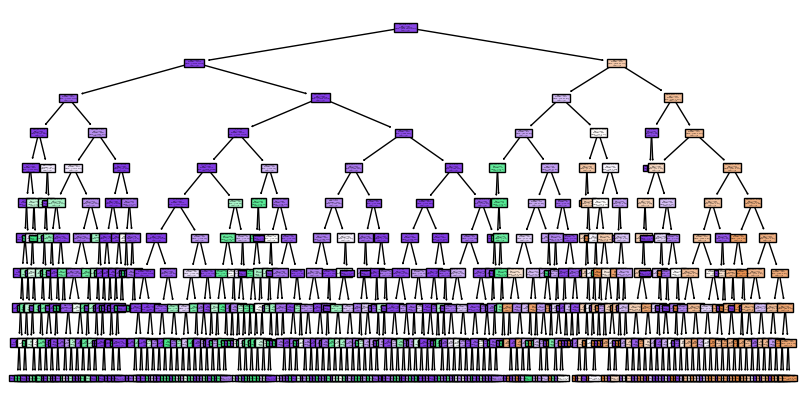

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10)  
# Fit the model on the training set
dt_model.fit(X_train, y_train)

# Predict on the validation and test sets
y_val_pred = dt_model.predict(X_val)
y_test_pred = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree - Validation Set:")
print(classification_report(y_val, y_val_pred))

print("Decision Tree - Test Set:")
print(classification_report(y_test, y_test_pred))




Decision Tree - Validation Set:
              precision    recall  f1-score   support

           1       0.69      0.89      0.78      1440
           2       0.77      0.54      0.64      1440
           3       0.98      0.98      0.98     37500

    accuracy                           0.96     40380
   macro avg       0.81      0.81      0.80     40380
weighted avg       0.96      0.96      0.96     40380

Decision Tree - Test Set:
              precision    recall  f1-score   support

           1       0.69      0.90      0.78      1833
           2       0.76      0.56      0.64      1833
           3       0.98      0.98      0.98     47729

    accuracy                           0.96     51395
   macro avg       0.81      0.81      0.80     51395
weighted avg       0.96      0.96      0.96     51395



### Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [42]:
# Initialize Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on validation and test sets
y_val_pred_rf = rf_model.predict(X_val)
y_test_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
print("Random Forest - Validation Set:")
print(classification_report(y_val, y_val_pred_rf))
print("Random Forest - Test Set:")
print(classification_report(y_test, y_test_pred_rf))

Random Forest - Validation Set:
              precision    recall  f1-score   support

           1       0.73      0.76      0.74      1440
           2       0.68      0.56      0.61      1440
           3       0.97      0.98      0.98     37500

    accuracy                           0.96     40380
   macro avg       0.79      0.77      0.78     40380
weighted avg       0.95      0.96      0.96     40380

Random Forest - Test Set:
              precision    recall  f1-score   support

           1       0.72      0.77      0.74      1833
           2       0.67      0.55      0.60      1833
           3       0.97      0.98      0.98     47729

    accuracy                           0.96     51395
   macro avg       0.79      0.77      0.77     51395
weighted avg       0.95      0.96      0.95     51395



#### Logistic Regression

In [15]:
! pip install imbalanced-learn



[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize Logistic Regression
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the Logistic Regression model
log_reg_model.fit(X_train_resampled, y_train_resampled)

# Predict on validation and test sets
y_val_pred = log_reg_model.predict(X_val)
y_test_pred = log_reg_model.predict(X_test)

# Evaluate the model
print("Logistic Regression - Validation Set:")
print(classification_report(y_val, y_val_pred))

print("Logistic Regression - Test Set:")
print(classification_report(y_test, y_test_pred))


KeyboardInterrupt: 